
 ***Participante: Humberto Santos***

 ***Definicion de su caso del proyecto y antecedentes:***
Características de una entidad financiera respecto a sus campañas y estrategias para mejorar en las próximas campañas de marketing la aceptación de los productos pasivos, con el onjetivo de mejorar identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras y mejorar el KPI de efectividad.

***Variables Discretas***
age,
job,
marital,
education,
default,
housing,
loan,
contact,
month,
day_of_week,
poutcome,
y

***Variables Continua***
duration,
campaign,
pdays,
previous,
emp.var.rate,
cons.price.idx,
cons.conf.idx,
euribor3m,
nr.employed

***Tecnica Aplicada: CLASIFICACION***

**Fuente trabajada:**
BankMarketing.xlsx

**Fuente Origen:**
BankMarketingIII.csv



## ***Clasificación***

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

## ***Conjunto de datos***

In [ ]:
Campaña = pd.read_csv('BankMarketingIII.csv',sep=";")

In [ ]:
Campaña.shape

(41188, 21)

In [ ]:
Campaña.head()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,1,1,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,2,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,1,2,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,3,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,1,1,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
Campaña['education']

0        1
1        2
2        2
3        3
4        2
        ..
41183    5
41184    5
41185    7
41186    5
41187    5
Name: education, Length: 41188, dtype: int64

In [ ]:
Campaña['education'].value_counts(normalize = True)

7    0.295426
2    0.231014
4    0.146766
5    0.127294
1    0.101389
3    0.055647
6    0.042027
8    0.000437
Name: education, dtype: float64

In [ ]:
Campaña['job'].value_counts(normalize = True)

1     0.253035
2     0.224677
10    0.163713
8     0.096363
5     0.070992
6     0.041760
3     0.035350
7     0.034500
4     0.025736
11    0.024619
9     0.021244
12    0.008012
Name: job, dtype: float64

In [ ]:
Campaña.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   martial         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# ***Exploracion del conjunto de datos***

In [ ]:
Campaña.describe()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.72458,1.510634,4.277532,1.208872,1.571914,1.199767,1.634748,6.607896,2.979581,...,2.567593,962.475454,0.172963,1.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.040998,1.411514,...,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.00000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,6.000000,3.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,8.00000,2.000000,7.000000,1.000000,2.000000,1.000000,2.000000,8.000000,4.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,12.00000,4.000000,8.000000,3.000000,3.000000,3.000000,2.000000,12.000000,5.000000,...,56.000000,999.000000,7.000000,3.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: xlabel='job', ylabel='Count'>

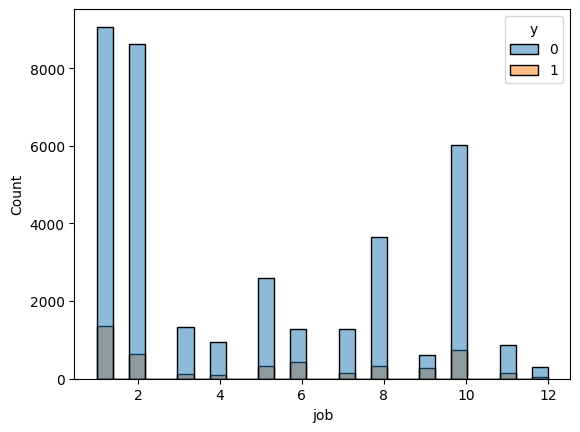

In [ ]:
sns.histplot(data = Campaña, x = 'job', hue = 'y')

<Axes: xlabel='martial', ylabel='Count'>

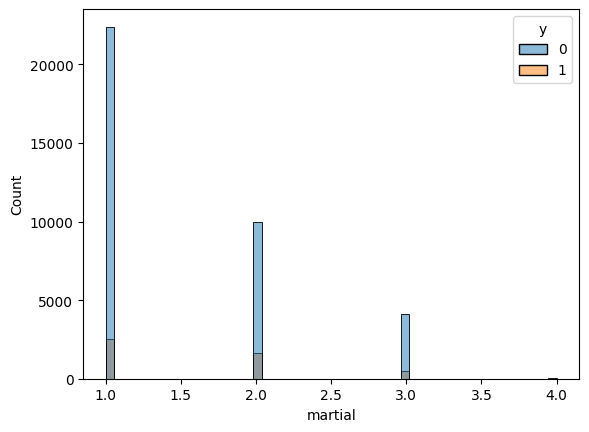

In [ ]:
sns.histplot(data = Campaña, x = 'martial', hue = 'y')

<Axes: xlabel='education', ylabel='Count'>

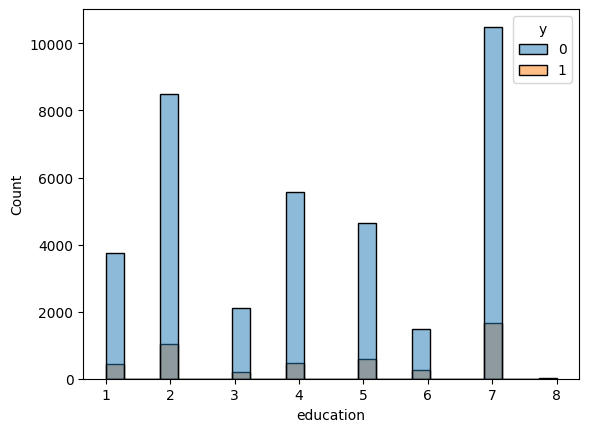

In [ ]:
sns.histplot(data = Campaña, x = 'education', hue = 'y')

<Axes: xlabel='contact', ylabel='Count'>

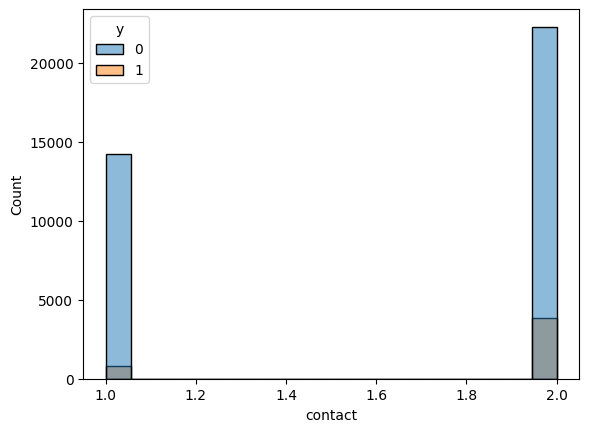

In [ ]:
sns.histplot(data = Campaña, x = 'contact', hue = 'y')

In [ ]:
Campaña.groupby('y').mean()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
0,39.911185,4.692405,1.504104,4.241928,1.223268,1.570072,1.200586,1.609910,6.580853,2.974527,220.844807,2.633085,984.113878,0.132374,1.125999,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,4.978017,1.562069,4.557974,1.095474,1.586422,1.193319,1.830388,6.820905,3.019397,553.191164,2.051724,792.035560,0.492672,1.515733,-1.233448,93.354386,-39.789784,2.123135,5095.115991


***Train y Test de Campaña***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Campaña.head()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,1,1,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,2,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,1,2,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,3,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,1,1,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
X = Campaña.drop('y',  axis= 1)
y = Campaña['y']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
X.head()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,4,1,1,1,1,1,1,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,8,1,2,2,1,1,1,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,8,1,2,1,2,1,1,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,1,1,3,1,1,1,1,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,8,1,2,1,1,2,1,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
y[:20]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: y, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)

In [ ]:
X_train.shape, X_test.shape

((32950, 20), (8238, 20))

In [ ]:
y_train.shape, y_test.shape

((32950,), (8238,))

In [ ]:
X_train.head()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16399,23,1,2,5,1,1,2,2,7,3,190,1,999,0,1,1.4,93.918,-42.7,4.963,5228.1
11429,35,2,1,3,1,1,1,1,6,5,170,1,999,0,1,1.4,94.465,-41.8,4.959,5228.1
1973,41,2,3,1,1,1,1,1,5,5,91,3,999,0,1,1.1,93.994,-36.4,4.855,5191.0
29910,41,2,1,5,1,1,1,2,4,1,233,3,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
23678,45,10,3,5,1,1,1,2,8,4,76,1,999,0,1,1.4,93.444,-36.1,4.962,5228.1


In [ ]:
X_test.head()

,age,job,martial,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
28239,44,2,1,4,1,1,1,2,4,2,1,1,999,0,1,-1.8,93.075,-47.1,1.453,5099.1
10515,46,4,1,1,2,1,2,1,6,2,166,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
36540,36,5,2,7,1,2,1,2,6,3,300,2,3,1,3,-2.9,92.963,-40.8,1.260,5076.2
2159,48,2,1,4,1,2,1,1,5,1,262,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
9168,41,2,1,2,2,1,2,1,6,5,320,1,999,0,1,1.4,94.465,-41.8,4.967,5228.1


# ***Árboles de Decisión***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
y_test_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# ***Matriz de confusión***

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[29261,     0],
       [    0,  3689]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[6785,  502],
       [ 419,  532]])

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29261
           1       1.00      1.00      1.00      3689

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7287
           1       0.51      0.56      0.54       951

    accuracy                           0.89      8238
   macro avg       0.73      0.75      0.74      8238
weighted avg       0.89      0.89      0.89      8238



In [ ]:
from sklearn.tree import plot_tree

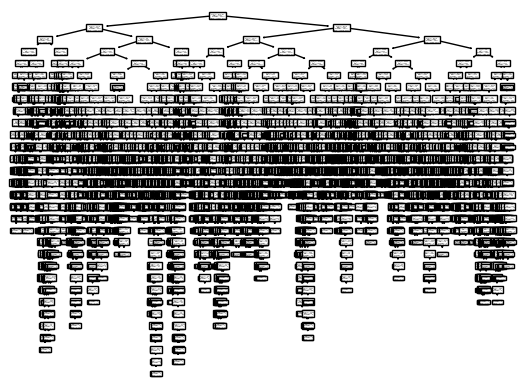

In [ ]:
_ = plot_tree(dt)

In [ ]:
plt.figure(figsize=(200,40))

_ = plot_tree(dt, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)

Output hidden; open in https://colab.research.google.com to view.

## **Parámetros**

***Profundidad***

In [41]:
dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [43]:
confusion_matrix(y_test, y_test_pred)

array([[7016,  271],
       [ 460,  491]])

In [44]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29261
           1       0.68      0.50      0.58      3689

    accuracy                           0.92     32950
   macro avg       0.81      0.74      0.77     32950
weighted avg       0.91      0.92      0.91     32950



In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7287
           1       0.64      0.52      0.57       951

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



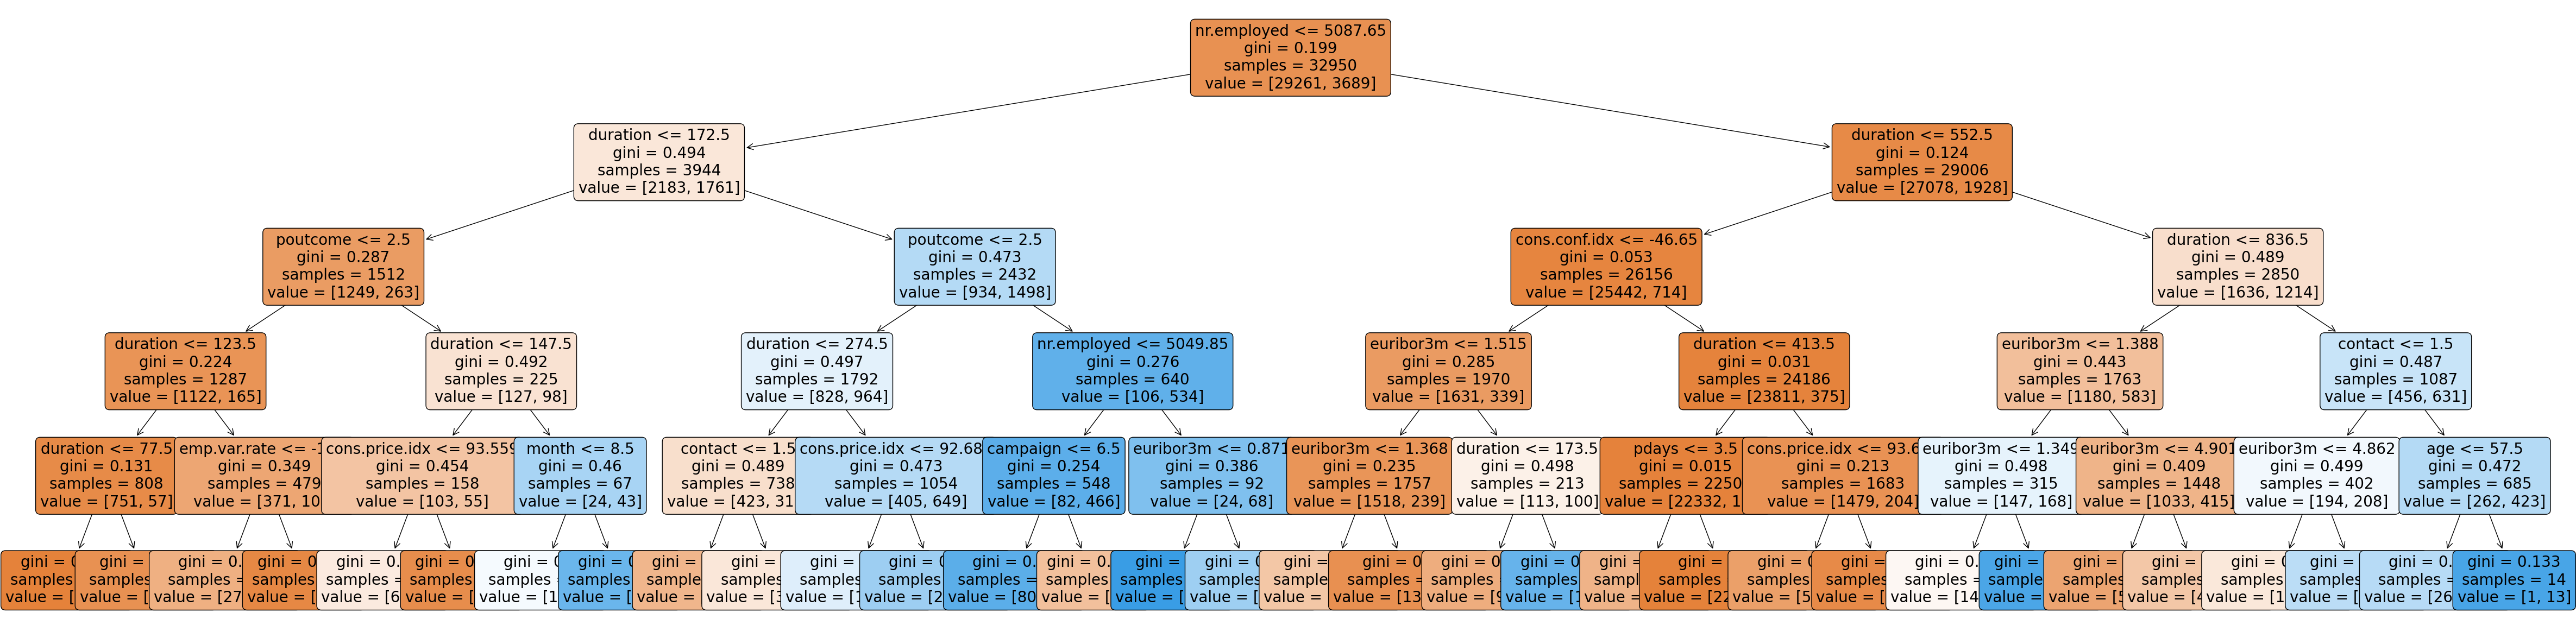

In [46]:
plt.figure(figsize=(60,15))

_ = plot_tree(dt, fontsize= 20, feature_names = X_train.columns, rounded = True, filled = True)

**Mínimo de muestras para split**


In [47]:
dt = DecisionTreeClassifier(min_samples_split= 1000)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=1000)

In [48]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [49]:
y_test_pred

array([0, 0, 1, ..., 1, 0, 0])

In [50]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     29261
           1       0.64      0.54      0.58      3689

    accuracy                           0.91     32950
   macro avg       0.79      0.75      0.77     32950
weighted avg       0.91      0.91      0.91     32950



In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7287
           1       0.62      0.55      0.58       951

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.77      8238
weighted avg       0.90      0.91      0.91      8238



In [52]:
confusion_matrix(y_test, y_test_pred)

array([[6963,  324],
       [ 427,  524]])

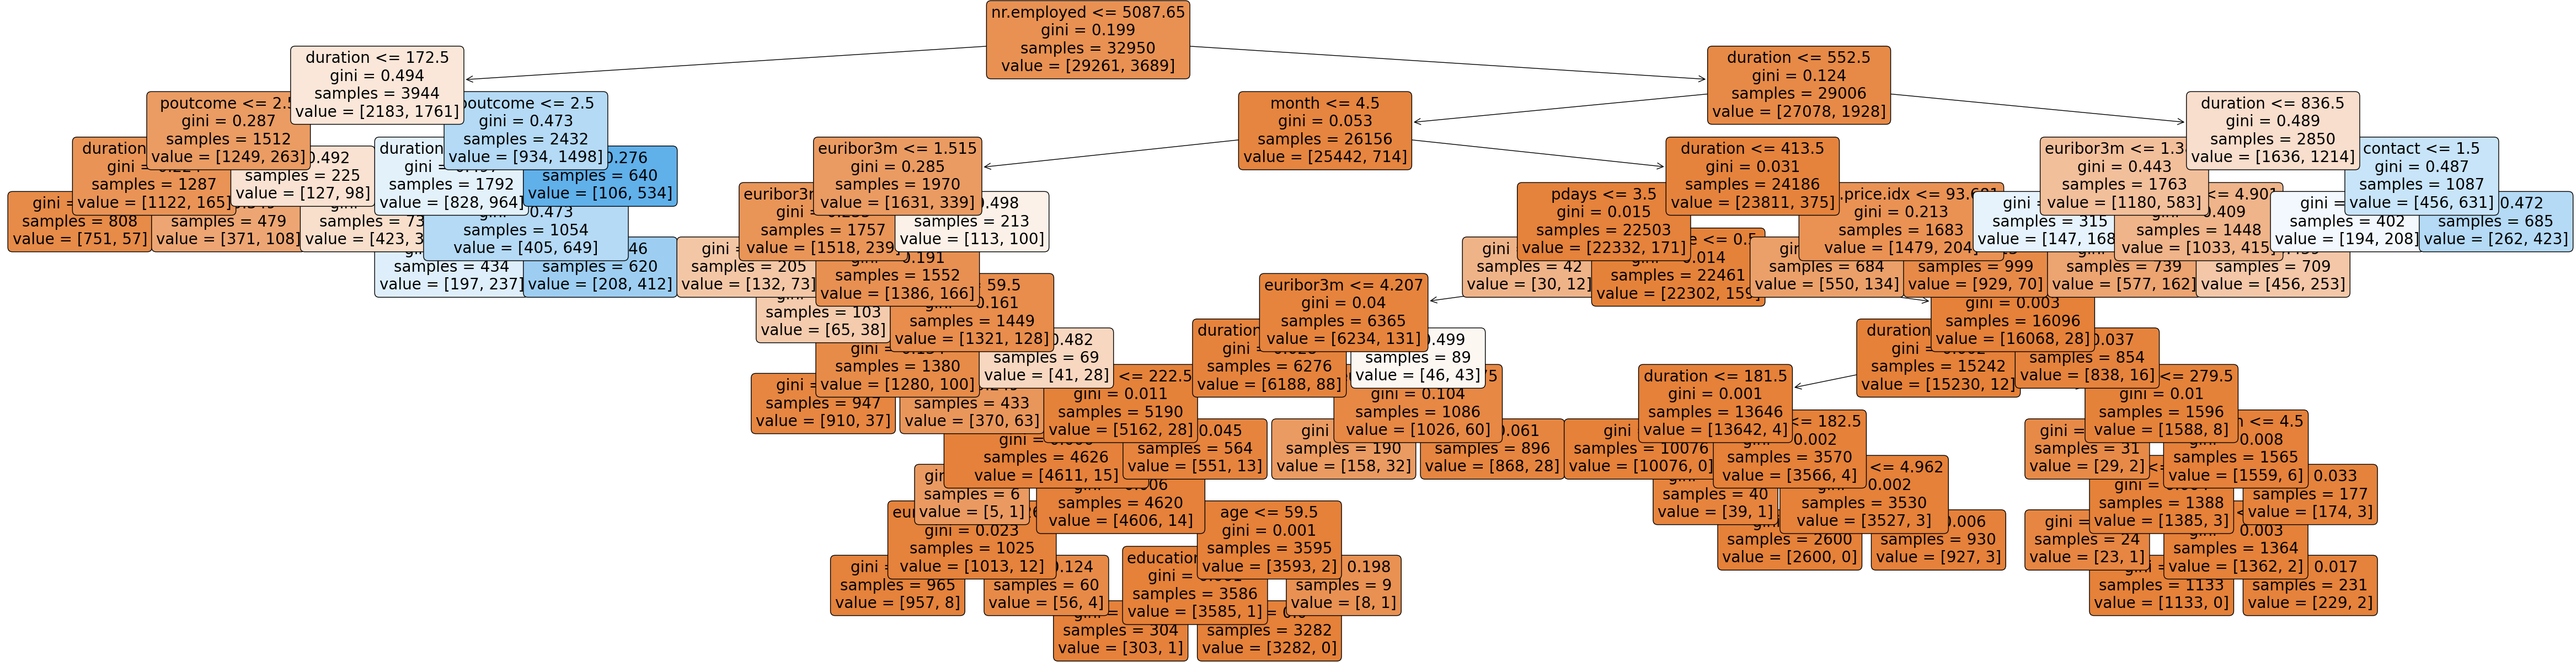

In [53]:
plt.figure(figsize=(60,15))

_ = plot_tree(dt, fontsize= 20, feature_names = X_train.columns, rounded = True, filled = True)

***Regresion Logistica***

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
from sklearn import metrics

In [56]:
estimador_logis = LogisticRegression()
estimador_logis.fit(X_train, y_train) # Entrenar el modelo / Ajustar el modelo a los datos

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
predicciones = estimador_logis.predict(X_test)

predicciones[:1000]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [58]:
predicciones_probabilidades = estimador_logis.predict_proba(X_test)
predicciones_probabilidades[:1000]

array([[0.96816382, 0.03183618],
       [0.98922079, 0.01077921],
       [0.35584014, 0.64415986],
       ...,
       [0.97735065, 0.02264935],
       [0.99358853, 0.00641147],
       [0.77060269, 0.22939731]])

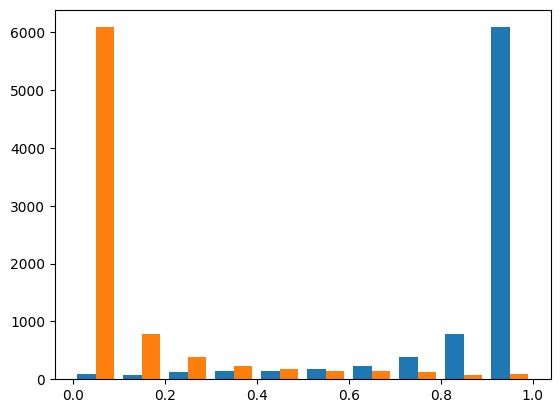

In [59]:
plt.hist(predicciones_probabilidades);

In [60]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [61]:
probs_df

,0,1
0,0.968164,0.031836
1,0.989221,0.010779
2,0.355840,0.644160
3,0.973572,0.026428
4,0.977478,0.022522
...,...,...
8233,0.968013,0.031987
8234,0.976254,0.023746
8235,0.618212,0.381788
8236,0.987313,0.012687


In [62]:
df_resultados = X_test.reset_index().copy()
df_resultados["objetivo"] = y_test.tolist()
df_resultados["prediccion"] = predicciones
df_resultados = pd.concat([df_resultados, probs_df], axis=1)
df_resultados[["objetivo", "prediccion", 0, 1]].head(10)

,objetivo,prediccion,0,1
0,0,0,0.968164,0.031836
1,0,0,0.989221,0.010779
2,1,1,0.355840,0.644160
3,0,0,0.973572,0.026428
4,0,0,0.977478,0.022522
5,0,0,0.983912,0.016088
6,0,0,0.981944,0.018056
7,0,0,0.890335,0.109665
8,1,1,0.450696,0.549304
9,0,0,0.987280,0.012720


In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[7086,  201],
       [ 574,  377]])

In [64]:
df = pd.DataFrame({"clase_real":y_test,
                   "clase_pred": predicciones,
                   "probabilidades_0":estimador_logis.predict_proba(X_test)[:,0],
                    "probabilidades_1":estimador_logis.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [65]:
df.sample(5)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
2160,0,0,0.988368,0.011632,1.0
30141,1,0,0.732251,0.267749,1.0
14746,1,0,0.903905,0.096095,1.0
15343,0,0,0.991132,0.008868,1.0
33988,0,0,0.825599,0.174401,1.0


In [67]:
df.head(15)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
28239,0,0,0.968164,0.031836,1.0
10515,0,0,0.989221,0.010779,1.0
36540,1,1,0.355840,0.644160,1.0
2159,0,0,0.973572,0.026428,1.0
9168,0,0,0.977478,0.022522,1.0
22244,0,0,0.983912,0.016088,1.0
6368,0,0,0.981944,0.018056,1.0
27381,0,0,0.890335,0.109665,1.0
30424,1,1,0.450696,0.549304,1.0
2485,0,0,0.987280,0.012720,1.0


In [68]:
df.query("probabilidades_1>0.5 & clase_pred==1").head(5)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
36540,1,1,0.355840,0.644160,1.0
30424,1,1,0.450696,0.549304,1.0
36675,1,1,0.009969,0.990031,1.0
40379,1,1,0.095212,0.904788,1.0
24788,1,1,0.273597,0.726403,1.0


In [69]:
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.2):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [70]:
predicciones_probabilidades[:100]

array([[0.96816382, 0.03183618],
       [0.98922079, 0.01077921],
       [0.35584014, 0.64415986],
       [0.97357185, 0.02642815],
       [0.977478  , 0.022522  ],
       [0.98391233, 0.01608767],
       [0.98194398, 0.01805602],
       [0.89033484, 0.10966516],
       [0.45069558, 0.54930442],
       [0.98728023, 0.01271977],
       [0.98256419, 0.01743581],
       [0.98778653, 0.01221347],
       [0.7930236 , 0.2069764 ],
       [0.99514531, 0.00485469],
       [0.77041806, 0.22958194],
       [0.98689499, 0.01310501],
       [0.96655776, 0.03344224],
       [0.9724618 , 0.0275382 ],
       [0.99080569, 0.00919431],
       [0.97330387, 0.02669613],
       [0.7803352 , 0.2196648 ],
       [0.90136323, 0.09863677],
       [0.97782307, 0.02217693],
       [0.8889209 , 0.1110791 ],
       [0.97189403, 0.02810597],
       [0.98518239, 0.01481761],
       [0.97861439, 0.02138561],
       [0.68975038, 0.31024962],
       [0.98292884, 0.01707116],
       [0.99204146, 0.00795854],
       [0.

In [71]:
probabilidades_a_clases(predicciones_probabilidades, umbral=0.2)[:100]

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [72]:
pred_1 = probabilidades_a_clases(predicciones_probabilidades, umbral=0.20)
confusion_matrix(y_test, pred_1)

array([[6609,  678],
       [ 266,  685]])

In [82]:
predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, 0.16)

In [83]:
sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
sensibilidad_umbral

0.7749737118822292

In [84]:
precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
precision_umbral

0.3861005242341138

In [85]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.001, max=0.999, step=0.001, value=0.001))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    precision_umbral = metrics.average_precision_score(y_test, predicciones_en_umbral)
    exactitud_umbral = metrics.accuracy_score(y_test, predicciones_en_umbral)
    roc_auc = metrics.roc_auc_score(y_test, predicciones_en_umbral)
    mc_umbral = confusion_matrix(y_test, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Exacitud:{:.3f}
    Area_ROC:{:.3F}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        exactitud_umbral,
        roc_auc
    ))
    print("Matriz de confusión")
    print(mc_umbral)

interactive(children=(FloatSlider(value=0.001, description='umbral', max=0.999, min=0.001, step=0.001), Output…

In [86]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral =  metrics.average_precision_score(y_test, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(y_test, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)

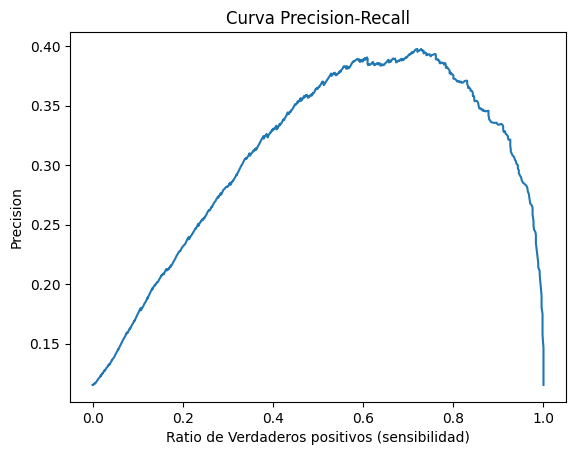

In [87]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

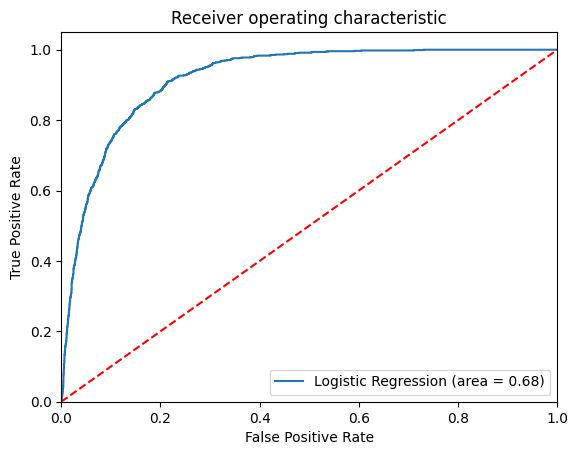

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, estimador_logis.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, estimador_logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [89]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud,
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))

evaluar_modelo(y_test, predicciones, predicciones_probabilidades)


    Exactitud: 0.906
    Precisión: 0.328
    Sensibilidad: 0.396
    Area bajo curva (AUC): 0.684
    Puntuación F1: 0.493
    


In [90]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(y_test, predicciones)[:20]

[(0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0)]